In [8]:
%matplotlib inline

In [1]:
import numpy as np
from sklearn import model_selection
import csv 
from classify import classify
import preprocessing as prep
import matplotlib.pyplot as plt

## Load data

In [28]:
csv_file_object = csv.reader(open('Data\\train.csv', 'r')) # Load in the csv file
header = next(csv_file_object)				  # Skip the fist line as it is a header
data=[] 

In [29]:
for row in csv_file_object: # Skip through each row in the csv file,
    data.append(row[0:]) 	# adding each row to the data variable
X = np.array(data) 		    # Then convert from a list to an array.
y = X[:,1].astype(int) # Save labels to y 

In [30]:
X = np.delete(X,1,1) # Remove survival column from matrix X
header = np.delete(header, 1)
# Initialize cross validation
kf = model_selection.KFold(n_splits=10)

## Basic classifier

In [5]:
totalInstances = 0 # Variable that will store the total intances that will be tested  
totalCorrect = 0 # Variable that will store the correctly predicted intances  
for trainIndex, testIndex in kf.split(X):
    trainSet = X[trainIndex]
    testSet = X[testIndex]
    trainLabels = y[trainIndex]
    testLabels = y[testIndex]
	
    predictedLabels = classify(trainSet, trainLabels, testSet)

    correct = 0	
    for i in range(testSet.shape[0]):
        if predictedLabels[i] == testLabels[i]:
            correct += 1
        
    print ('Accuracy: ' + str(float(correct)/(testLabels.size)))
    totalCorrect += correct
    totalInstances += testLabels.size
print ('Total Accuracy: ' + str(totalCorrect/float(totalInstances)))

Accuracy: 0.8111111111111111
Accuracy: 0.8202247191011236
Accuracy: 0.7528089887640449
Accuracy: 0.8426966292134831
Accuracy: 0.7640449438202247
Accuracy: 0.797752808988764
Accuracy: 0.7415730337078652
Accuracy: 0.7303370786516854
Accuracy: 0.8426966292134831
Accuracy: 0.7640449438202247
Total Accuracy: 0.7867564534231201


## Preprocessing

In [31]:
X, header = prep.preprocess(X, header)

## PCA

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85, svd_solver="full")
pca.fit_transform(X)

array([[-0.90689809, -1.11664236,  0.34570448, -0.33710186, -0.43465847,
        -0.142558  ],
       [ 1.10472337,  2.24855723, -0.47553846, -0.76303608,  1.12544951,
         0.24220124],
       [ 0.13359554, -0.93564802, -1.2361569 ,  1.47337841,  0.34253642,
         0.09220624],
       ...,
       [ 1.71040425, -1.45689488,  0.24976323,  1.01511962,  0.97119988,
         0.46009333],
       [-0.12844165,  1.59932328, -0.93838295, -1.45920728, -0.2963903 ,
        -0.21862364],
       [-1.21215495, -0.10391074, -0.4223418 , -0.84745066,  0.20845549,
         0.24769247]])

## Decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

def decisionTree(D):
    totalInstances = 0 # Variable that will store the total intances that will be tested  
    totalCorrect = 0 # Variable that will store the correctly predicted intances  
    clf = DecisionTreeClassifier(max_depth=D)
    for trainIndex, testIndex in kf.split(X):
        trainSet = X[trainIndex]
        testSet = X[testIndex]
        trainLabels = y[trainIndex]
        testLabels = y[testIndex]
        
        clf.fit(trainSet, trainLabels)
        predictedLabels = clf.predict(testSet)

        correct = 0	
        for i in range(testSet.shape[0]):
            if predictedLabels[i] == testLabels[i]:
                correct += 1
            
        totalCorrect += correct
        totalInstances += testLabels.size
        accuracy = totalCorrect/float(totalInstances)
    print ('Total Accuracy: ' + str(accuracy))
    return accuracy

## Testing Decision Tree for different depths (best result with D=5 or 6)

2
Total Accuracy: 0.7643097643097643
3
Total Accuracy: 0.8170594837261503
4
Total Accuracy: 0.8058361391694725
5
Total Accuracy: 0.8114478114478114
6
Total Accuracy: 0.813692480359147
7
Total Accuracy: 0.8035914702581369
8
Total Accuracy: 0.7912457912457912
9
Total Accuracy: 0.7934904601571269
10
Total Accuracy: 0.8047138047138047
11
Total Accuracy: 0.7833894500561167
12
Total Accuracy: 0.7789001122334456
13
Total Accuracy: 0.7867564534231201
14
Total Accuracy: 0.7811447811447811


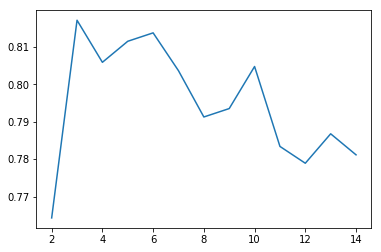

In [21]:
Ds = range(2,15)
accuracys = []
for D in Ds:
    print(D)
    accuracys.append(decisionTree(D))

plt.plot(Ds, accuracys, label = "accuracy % D")
plt.show()

## AdaBoost with decision trees

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def adaBoost(D):
    totalInstances = 0 # Variable that will store the total intances that will be tested  
    totalCorrect = 0 # Variable that will store the correctly predicted intances  
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=D))
    for trainIndex, testIndex in kf.split(X):
        trainSet = X[trainIndex]
        testSet = X[testIndex]
        trainLabels = y[trainIndex]
        testLabels = y[testIndex]
        
        clf.fit(trainSet, trainLabels)
        predictedLabels = clf.predict(testSet)

        correct = 0	
        for i in range(testSet.shape[0]):
            if predictedLabels[i] == testLabels[i]:
                correct += 1
            
        totalCorrect += correct
        totalInstances += testLabels.size
        accuracy = totalCorrect/float(totalInstances)
    print ('Total Accuracy: ' + str(accuracy))
    return accuracy

## Adaboost Test for Different values of D (best with D=7) 

2
Total Accuracy: 0.7934904601571269
3
Total Accuracy: 0.7946127946127947
4
Total Accuracy: 0.7744107744107744
5
Total Accuracy: 0.792368125701459
6
Total Accuracy: 0.7867564534231201
7
Total Accuracy: 0.7890011223344556
8
Total Accuracy: 0.7867564534231201
9
Total Accuracy: 0.797979797979798
10
Total Accuracy: 0.7789001122334456
11
Total Accuracy: 0.7946127946127947
12
Total Accuracy: 0.8002244668911336
13
Total Accuracy: 0.7946127946127947
14
Total Accuracy: 0.8047138047138047


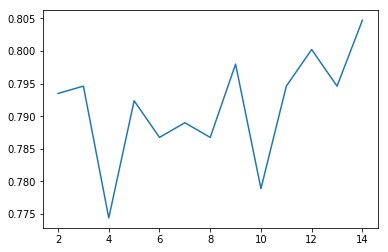

In [22]:
Ds = range(2,15)
accuracys = []
for D in Ds:
    print(D)
    accuracys.append(adaBoost(D))

plt.plot(Ds, accuracys, label = "accuracy % D")
plt.show()

## Neural Network

In [14]:
from sklearn.neural_network import MLPClassifier

def NN(hl_sizes=(100,), activation='relu', solver='sgd', lr=0.01, lr_evol='constant', max_iter=200, tol=0.001, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5):
    totalInstances = 0 # Variable that will store the total intances that will be tested  
    totalCorrect = 0 # Variable that will store the correctly predicted intances  
    clf = MLPClassifier(hidden_layer_sizes=hl_sizes, activation=activation, solver=solver , learning_rate_init=lr, learning_rate=lr_evol, max_iter=max_iter, tol= tol, early_stopping=early_stopping, validation_fraction=validation_fraction, n_iter_no_change=n_iter_no_change)
    for trainIndex, testIndex in kf.split(X):
        trainSet = X[trainIndex]
        testSet = X[testIndex]
        trainLabels = y[trainIndex]
        testLabels = y[testIndex]
        
        clf.fit(trainSet, trainLabels)
        predictedLabels = clf.predict(testSet)

        correct = 0	
        for i in range(testSet.shape[0]):
            if predictedLabels[i] == testLabels[i]:
                correct += 1
            
        totalCorrect += correct
        totalInstances += testLabels.size
        accuracy = totalCorrect/float(totalInstances)
    return accuracy

## NN Test with sgd, different constant lr, 1 hidden layer of varying size 

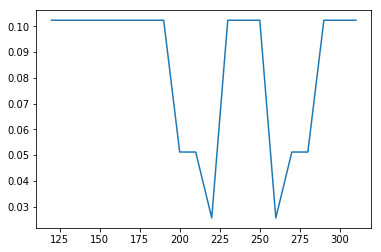

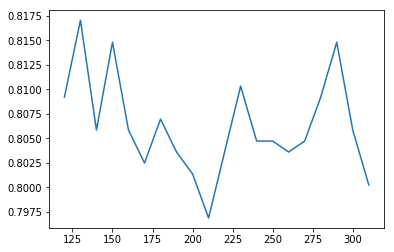

In [23]:
lrs = [(2**n)*0.0001 for n in range(11)]
sizes = [(120+10*n,) for n in range(20)]
accuracies=np.zeros((len(lrs), len(sizes)))

for i in range(len(lrs)):
    for j in range(len(sizes)):
        accuracies[i,j]=NN(hl_sizes=sizes[j], lr=lrs[i])

idx = np.argsort(accuracies, axis=0)
plt.figure(1)
plt.plot(sizes, [lrs[i] for i in idx[-1,:]], label="best learning rate for each hidden layer size")
plt.figure(2)
plt.plot(sizes, [accuracies[idx[-1,i],i] for i in range(len(sizes))], label="corresponding accuracies")
plt.show()


## NN Test for higher hidden layers sizes (from 200 to 400)

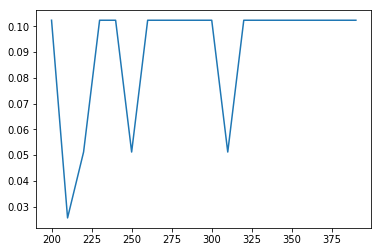

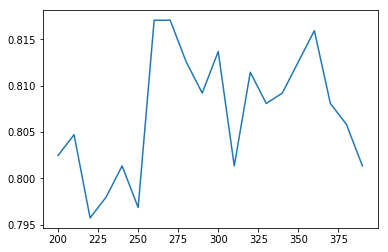

In [24]:
lrs = [(2**n)*0.0001 for n in range(11)]
sizes = [(200+10*n,) for n in range(20)]
accuracies=np.zeros((len(lrs), len(sizes)))

for i in range(len(lrs)):
    for j in range(len(sizes)):
        accuracies[i,j]=NN(hl_sizes=sizes[j], lr=lrs[i])

idx = np.argsort(accuracies, axis=0)
plt.figure(1)
plt.plot(sizes, [lrs[i] for i in idx[-1,:]], label="best learning rate for each hidden layer size")
plt.figure(2)
plt.plot(sizes, [accuracies[idx[-1,i],i] for i in range(len(sizes))], label="corresponding accuracies")
plt.show()

## LDA

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

totalInstances = 0 # Variable that will store the total intances that will be tested  
totalCorrect = 0 # Variable that will store the correctly predicted intances  
clf = LDA(solver='eigen')
for trainIndex, testIndex in kf.split(X):
    trainSet = X[trainIndex]
    testSet = X[testIndex]
    trainLabels = y[trainIndex]
    testLabels = y[testIndex]

    clf.fit(trainSet, trainLabels)
    clf.transform(testSet)
    predictedLabels = clf.predict(testSet)

    correct = 0	
    for i in range(testSet.shape[0]):
        if predictedLabels[i] == testLabels[i]:
            correct += 1

    totalCorrect += correct
    totalInstances += testLabels.size
    accuracy = totalCorrect/float(totalInstances)
print("Total accuracy : ",str(accuracy))


NameError: name 'kf' is not defined